<a href="https://colab.research.google.com/github/sy-veronica/ML/blob/main/01_Linear_Regression.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **1. Linear Regression (선형 회귀)**

### **공부시간에 따른 시험점수**

In [117]:
# (1) 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [118]:
# (2) 데이터 불러오기
dataset = pd.read_csv('/content/drive/MyDrive/03. 파이썬 (ML)/02. dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [119]:
# (3) 독립변수, 원인(X) & 종속변수, 결과(y) 지정하기
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터
y = dataset.iloc[:, -1].values  # 마지막 컬럼 데이터
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [120]:
# (4) 선형 회귀 모델 만들기
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  # 객체 생성
reg.fit(X, y)             # 모델 생성 (학습)

LinearRegression()

In [121]:
# (5) 학습을 통해 생성된 모델을 바탕으로 예측값(y_pred) 출력
y_pred = reg.predict(X)   # X에 대한 예측값

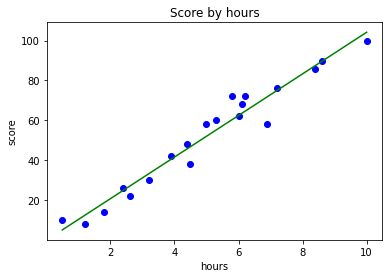

In [122]:
# (6) 시각화
plt.scatter(X, y, color='blue')     # 산포도    (주어진 데이터셋의 산포도)
plt.plot(X, y_pred, color='green')  # 선 그래프 (선형회귀 모델의 선 그래프)
plt.title('Score by hours')         # 그래프의 제목
plt.xlabel('hours')                 # X축 이름
plt.ylabel('score')                 # y축 이름
plt.show()

In [123]:
# (7) 학습을 통해 생성된 모델에 특정 독립변수를 대입했을 때의 예측값(y_pred)
print('9시간 공부했을 때 예상점수 :', reg.predict([[9]]))  # 주의 : [[2차원 배열]] 형태로 기입할 것, [[9],[8],[7]]

9시간 공부했을 때 예상점수 : [93.77478776]


In [124]:
# (8) 생성된 모델로 도출된 예측값 검토하기   (y=mx+b)
reg.coef_        # 기울기(m)

array([10.44369694])

In [125]:
reg.intercept_   # y 절편(b)

-0.218484702867201

### **데이터 세트 분리**

In [126]:
# (1) 라이브러리 불러오기
import pandas as pd
import matplotlib.pyplot as plt

In [127]:
# (2) 데이터 불러오기
dataset = pd.read_csv('/content/drive/MyDrive/03. 파이썬 (ML)/02. dataset/LinearRegressionData.csv')
dataset.head()

,hour,score
0,0.5,10
1,1.2,8
2,1.8,14
3,2.4,26
4,2.6,22


In [128]:
# (3-1) 독립변수, 원인(X) & 종속변수, 결과(y) 지정하기
X = dataset.iloc[:, :-1].values # 처음부터 마지막 컬럼 직전까지의 데이터
y = dataset.iloc[:, -1].values  # 마지막 컬럼 데이터
X, y

(array([[ 0.5],
        [ 1.2],
        [ 1.8],
        [ 2.4],
        [ 2.6],
        [ 3.2],
        [ 3.9],
        [ 4.4],
        [ 4.5],
        [ 5. ],
        [ 5.3],
        [ 5.8],
        [ 6. ],
        [ 6.1],
        [ 6.2],
        [ 6.9],
        [ 7.2],
        [ 8.4],
        [ 8.6],
        [10. ]]),
 array([ 10,   8,  14,  26,  22,  30,  42,  48,  38,  58,  60,  72,  62,
         68,  72,  58,  76,  86,  90, 100]))

In [129]:
# (3-2) 데이터 세트 분리하기
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)  # 훈련(80) : 테스트(20)으로 분리

In [130]:
# 분리된 데이터 세트 검토하기
X, len(X)             # X 전체 데이터, 개수
X_train, len(X_train) # X 훈련 세트, 개수
X_test, len(X_test)   # X 테스트 세트, 개수
y, len(y)             # y 전체 데이터, 개수
y_train, len(y_train) # y 훈련 세트, 개수
y_test, len(y_test)   # y 테스트 세트트, 개수

(array([ 90,   8, 100,  38]), 4)

### **분리된 데이터 세트를 통한 모델링**

In [131]:
# (4) 훈련 세트를 이용하여 선형 회귀 모델 만들기
from sklearn.linear_model import LinearRegression
reg = LinearRegression()  # 객체 생성
reg.fit(X_train, y_train) # 모델 생성 (훈련 세트로 학습)

LinearRegression()

In [132]:
# (5) 학습을 통해 생성된 모델을 바탕으로 예측값(y_pred) 출력
# y_pred = reg.predict(X)   # X에 대한 예측값

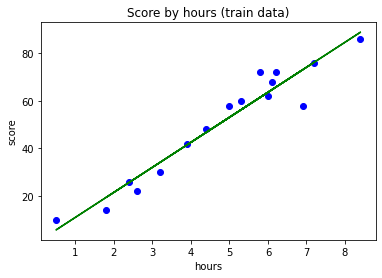

In [133]:
# (6-1) 시각화 (훈련 세트)
plt.scatter(X_train, y_train, color='blue')             # 산포도    (주어진 훈련 데이터셋의 산포도)
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 (훈련 세트로 학습된 선형회귀 모델의 선 그래프)
plt.title('Score by hours (train data)')  # 그래프의 제목
plt.xlabel('hours')                       # X축 이름
plt.ylabel('score')                       # y축 이름
plt.show()

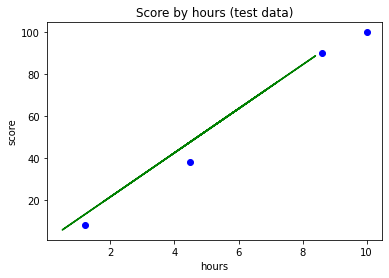

In [134]:
# (6-2) 시각화 (테스트 세트)
plt.scatter(X_test, y_test, color='blue')               # 산포도    (주어진 테스트 데이터셋의 산포도)
plt.plot(X_train, reg.predict(X_train), color='green')  # 선 그래프 (훈련 세트로 학습된 선형회귀 모델의 선 그래프)
plt.title('Score by hours (test data)')  # 그래프의 제목
plt.xlabel('hours')                      # X축 이름
plt.ylabel('score')                      # y축 이름
plt.show()

In [135]:
# (8) 훈련 세트로 학습된 선형 회귀 모델의 기울기와 y절편 검토하기   (y=mx+b)
#     전체 데이터로 학습시킨 경우의 기울기, y절편의 값과 달라졌음을 확인할 수 있음음
reg.coef_        # 기울기(m)

array([10.49161294])

In [136]:
reg.intercept_   # y 절편(b)

0.6115562905169369

### **모델 평가**




In [137]:
# (9) 모델이 잘 만들어졌는지 평가하기
reg.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9356663661221668

In [138]:
reg.score(X_test, y_test)   # 테스트 세트를 통한 모델 평가

0.9727616474310156

# **경사 하강법 (Gradient Descent)**

In [139]:
# (4-2) 확률적 경사 하강법을 이용하여 선형 회귀 모델 만들기
from sklearn.linear_model import SGDRegressor     # SGD(Stochastic Gradient Descent) 확률적 경사 하강법
sr = SGDRegressor()       # 객체 생성
# sr = SGDRegressor(max_iter=1000, eta0=0.001, random_state=0, verbose=1)
sr.fit(X_train, y_train)  # 모델 생성 (훈련 세트로 학습)

SGDRegressor()

```
- max_iter : 훈련 세트 반복 횟수 (Epoch 횟수)
- eta0     : 학습률 (Learning rate)
```

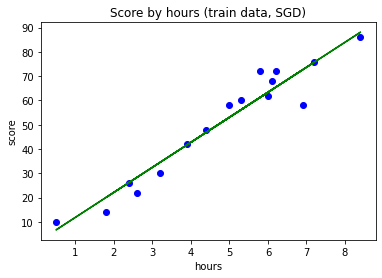

In [140]:
# (6-1) 시각화 (훈련 세트)
plt.scatter(X_train, y_train, color='blue')             # 산포도    (주어진 훈련 데이터셋의 산포도)
plt.plot(X_train, sr.predict(X_train), color='green')   # 선 그래프 (훈련 세트로 학습된 선형회귀 모델의 선 그래프)
plt.title('Score by hours (train data, SGD)')         # 그래프의 제목
plt.xlabel('hours')                 # X축 이름
plt.ylabel('score')                 # y축 이름
plt.show()

In [141]:
# (8) 훈련 세트로 학습된 SGD 선형 회귀 모델의 기울기와 y절편 검토하기   (y=mx+b)
#     훈련 세트로 학습된 선형 회귀 모델의 기울기, y절편의 값과 달라졌음을 확인할 수 있음음
sr.coef_        # 기울기(m)

array([10.30412734])

In [142]:
sr.intercept_   # y 절편(b)

array([1.52020789])

In [143]:
# (9) 모델이 잘 만들어졌는지 평가하기
sr.score(X_train, y_train) # 훈련 세트를 통한 모델 평가

0.9353666779145963

In [144]:
sr.score(X_test, y_test)   # 테스트 세트를 통한 모델 평가

0.9730385940589729